# Data Exploration

Python Version 3.12.14

Prerequisites:
``` 
python binary_preprocess.py
python dataset_split.py
python image_preprocess.py
```

In [2]:
import os
import numpy as np
import ujson as json
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# set default size to display larger figures
plt.rcParams['figure.figsize'] = (10.0, 8.0)

## Data exploration script

It computes:
- number of examples
- fraction of user labeled examples

It plots:
- class distributions
- holds used for easy (6B+), intermediate (7B+) and hard (8B+) problems

It describes:
- train/val/test splits

In [3]:
def class_distribution(grade2class, y_list, n_total, fig_legend, y_user_list=None):
    """Plot an histogram of the class distribution in the dataset(s)
    """    
    
    if not isinstance(y_list, list):
        y_list = [y_list]
    
    for k, subset_name in enumerate(fig_legend):
        y_filtered = y_list[k][y_list[k] != -1]
        # number of examples 
        n_examples = y_filtered.shape[0]
        print("There are {} examples in {}: {:.2f} of the whole dataset.".format(n_examples, subset_name, n_examples/n_total))
        
        if not y_user_list is None:
            y_user_filtered = y_user_list[k][y_user_list[k] != -1]
            print("Only {:.2f}% of them have a user-assigned grade".format(y_user_filtered.shape[0]/n_examples*100))

    
    # class distribution
    class_min = min(grade2class.values())
    class_max = max(grade2class.values())
    
    # plot histogram
    plt.hist(y_list, bins = range(class_min, class_max+2), density=True, histtype='bar')
    plt.legend(fig_legend)
    plt.xticks(list(grade2class.values()), list(grade2class.keys()))
    plt.xlabel("Grade")
    plt.ylabel("Frequency")
    plt.title("Class distribution")
    plt.show()
    # print class distribution
    for k, subset_name in enumerate(fig_legend):
        y_filtered = y_list[k][y_list[k] != -1]
        grade2freq = {grade: round(y_filtered[y_filtered==grade2class[grade]].shape[0]/y_filtered.shape[0]*100, 1) for grade in grade2class.keys()}
        print("Distribution of classes in {} :\n{}".format(subset_name, grade2freq))

----------------------------Data exploration for MoonBoard version 2017-----------------------------
There are in total 20043 examples (distinct MoonBoard version 2017 problems).
There are 20043 examples in true label: 1.00 of the whole dataset.
There are 7304 examples in user assigned grade: 0.36 of the whole dataset.


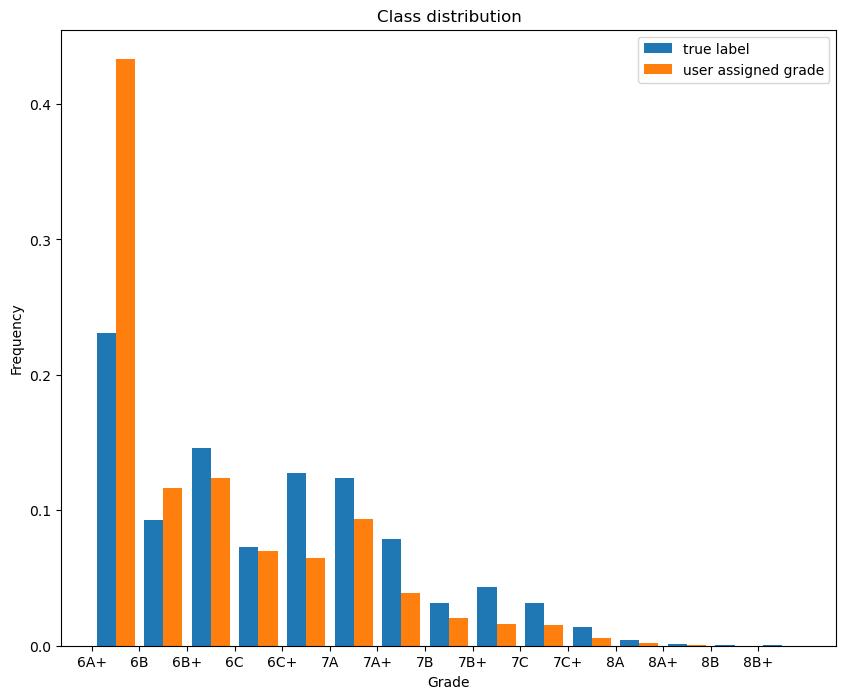

Distribution of classes in true label :
{'6A+': 23.1, '6B': 9.3, '6B+': 14.6, '6C': 7.3, '6C+': 12.8, '7A': 12.4, '7A+': 7.9, '7B': 3.2, '7B+': 4.3, '7C': 3.1, '7C+': 1.4, '8A': 0.4, '8A+': 0.1, '8B': 0.0, '8B+': 0.1}
Distribution of classes in user assigned grade :
{'6A+': 43.3, '6B': 11.6, '6B+': 12.3, '6C': 7.0, '6C+': 6.5, '7A': 9.3, '7A+': 3.9, '7B': 2.0, '7B+': 1.6, '7C': 1.5, '7C+': 0.6, '8A': 0.2, '8A+': 0.1, '8B': 0.0, '8B+': 0.0}


In [4]:
MBversions = 2017
ppDirName="../DATA/binary"
    
# input type cleanup to match expected type
if not isinstance(MBversions, list):
    MBversions = [MBversions]

# initialization
X_list, X_type_list, y_list, y_user_list = [], [], [], []
        
for MBversion in MBversions:
    MBversion = str(MBversion)
    print("{:-^100}".format("Data exploration for MoonBoard version {}".format(MBversion)))
    # path to the data
    ppVersionDirName = ppDirName
    # import the data
    X_list.append(np.load(os.path.join(ppVersionDirName, "X.npy")))
    X_type_list.append(np.load(os.path.join(ppVersionDirName, "X_type.npy")))
    y_list.append(np.load(os.path.join(ppVersionDirName, "y.npy")))
    y_user_list.append(np.load(os.path.join(ppVersionDirName, "y_user.npy")))

X, X_type, y, y_user = np.vstack(X_list), np.vstack(X_type_list), np.hstack(y_list), np.hstack(y_user_list)

with open(os.path.join(ppVersionDirName, "grade2class.json")) as json_file:  
    grade2class = json.load(json_file)

# number of examples 
n_total = y.shape[0]
print("There are in total {} examples (distinct MoonBoard version {} problems).".format(n_total, MBversion))
    
# class distribution
class_distribution(grade2class, [y, y_user], n_total, ["true label", "user assigned grade"])

In [40]:
def plot_heatmap(grades):
    # plots a heatmap of the holds
    fig, axn = plt.subplots(1, len(grades))
    cbar_ax = fig.add_axes([.91, .25, .03, .5])

    for i, grade in enumerate(grades):
        # filter holds based on their type: only intermediate holds are kept (as start and end holds tend to be most similar and most frequent)
        mask = X_type == 1
        X_filtered = X*mask
        # filter examples based on their label
        X_filtered = X_filtered[y == grade2class[grade],:]
        # build the heatmap
        heatmap = np.reshape(np.sum(X_filtered, axis=0), (18,11))
        freq_heatmap = heatmap / X_filtered.shape[0]
        # plot the heatmap
        ax = sns.heatmap(freq_heatmap, vmax=0.3, cmap='magma', linewidth=0.5, square=True, 
                            xticklabels = [str(chr(k)) for k in range(ord("A"), ord("A") + heatmap.shape[1])],
                            yticklabels = range(heatmap.shape[0],0,-1),
                            mask=(freq_heatmap==0), ax=axn[i], 
                            cbar = not i, cbar_ax=None if i else cbar_ax)
        ax.set_title(grade)
    plt.show()

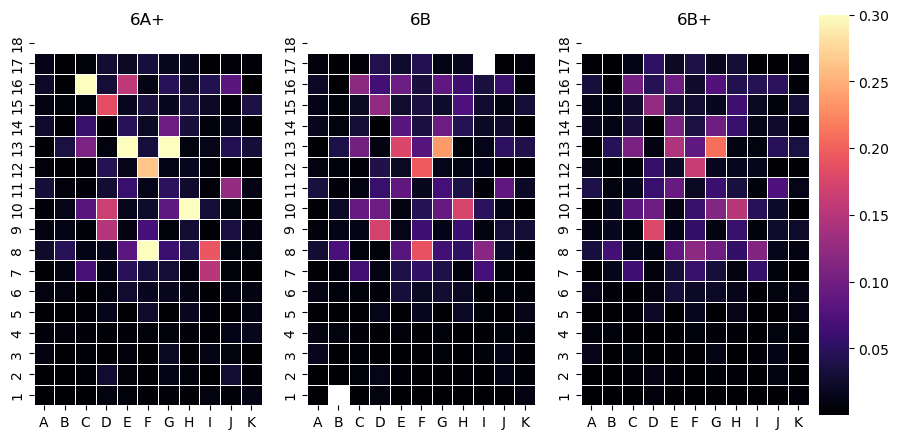

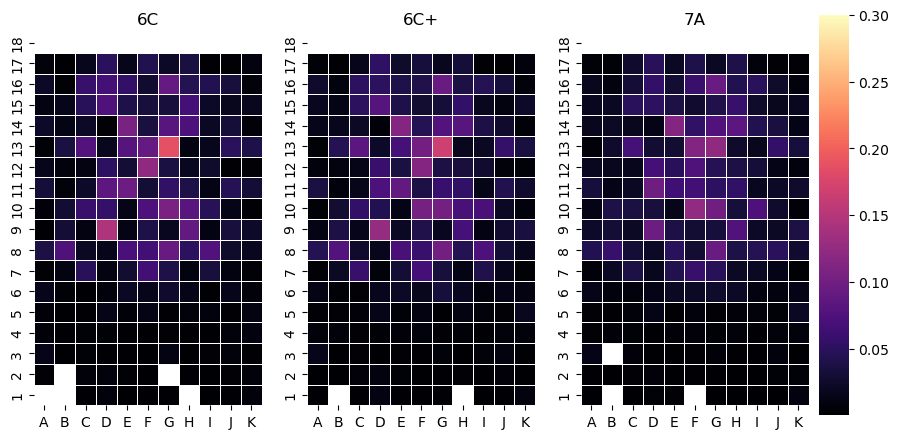

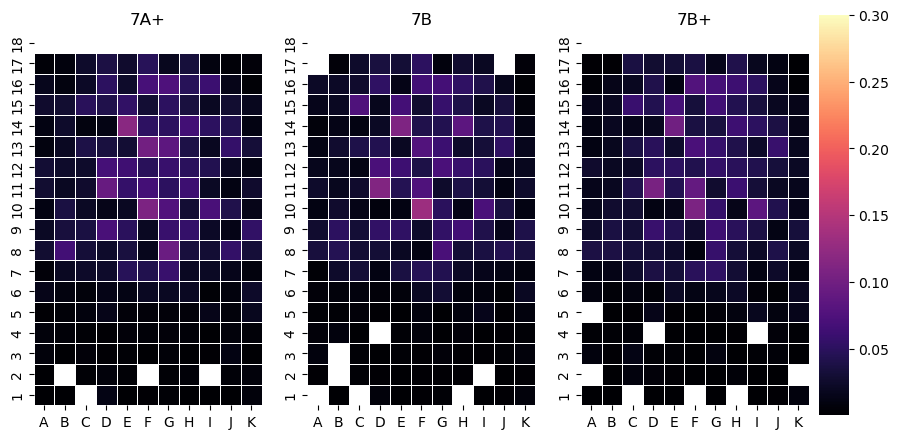

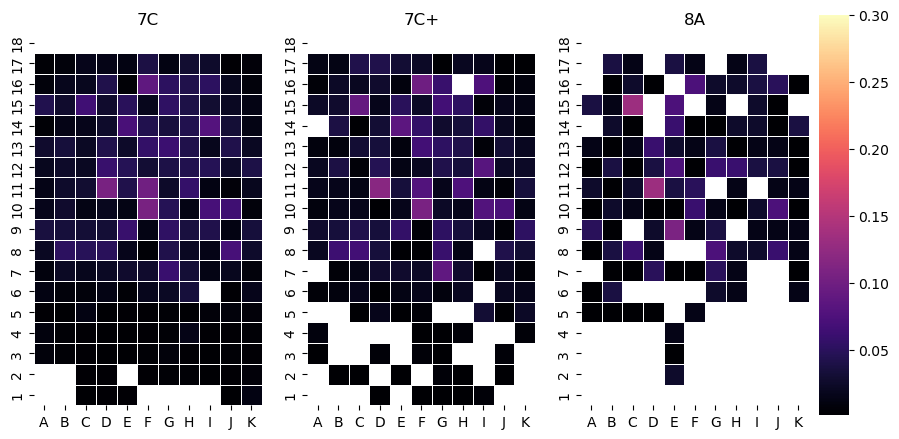

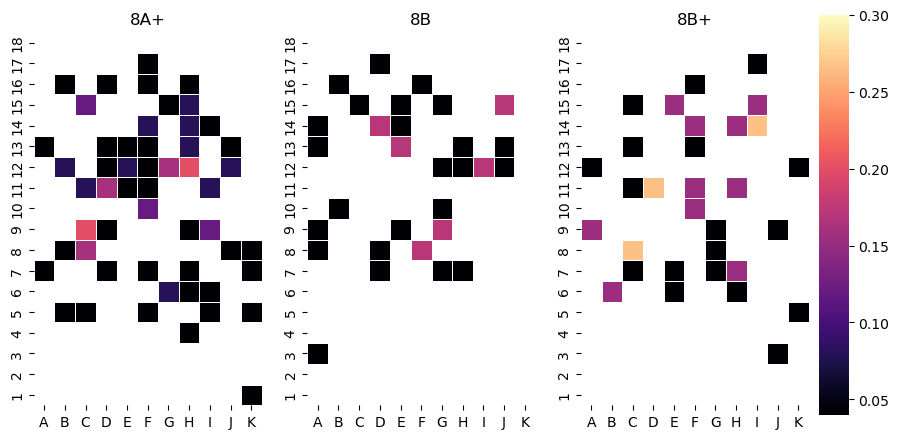

In [46]:
# '6A+', '6B', '6B+', '6C', '6C+', '7A', '7A+', '7B', '7B+', '7C', '7C+', '8A', '8A+', '8B', '8B+'
plot_heatmap(['6A+', '6B', '6B+'])  #V3-V4
plot_heatmap(['6C', '6C+', '7A'])   #V5-V6
plot_heatmap(['7A+', '7B', '7B+'])  #V7-V8
plot_heatmap(['7C', '7C+', '8A'])   #V9-V11
plot_heatmap(['8A+', '8B', '8B+'])  #V12-V14

